# SRules

# Statics

In [1]:
import dask.dataframe as dd
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics


## Load Dataset

In [2]:


from SRules.Utils.DatasetUtils import read_dataset

filename = "salud-covid"
#filename = "divorce"
test_size=0.1
path = f'../..'
dataset_path_name = f'{path}/data/{filename}.csv'
X, y, dataset, target_value_name, pandas_dataset = read_dataset(filename, dataset_path_name)

pandas_dataset.head()

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display


,EMERGENCY_DIA_SHORT_F05,EMERGENCY_DIA_SHORT_J12,EMERGENCY_DIA_SHORT_R06,EMERGENCY_DIA_SHORT_K52,EMERGENCY_DIA_SHORT_I10,EMERGENCY_DIA_SHORT_J22,EMERGENCY_DIA_SHORT_J84,EMERGENCY_DIA_SHORT_E87,EMERGENCY_DIA_SHORT_R09,EMERGENCY_DIA_SHORT_J98,...,ANTECEDENTS_PROC_BW03ZZZ,ANTECEDENTS_PROC_0TPBX0Z,ANTECEDENTS_PROC_F0796FZ,ANTECEDENTS_PROC_4A12X4Z,ANTECEDENTS_PROC_3E03329,SEXO,AGE_LOWER_40,AGE_40_60,AGE_HIGHER_60,RESULT
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,True


In [3]:
#Define dataset
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=test_size, random_state=1)
encoded_train_pandas_dataset = pd.DataFrame(data= np.c_[X_train, y_train], columns= list(dataset['feature_names']) + [target_value_name])
encoded_test_pandas_dataset = pd.DataFrame(data= np.c_[X_test, y_test], columns= list(dataset['feature_names']) + [target_value_name])
print('Sizes (without target):')
print(f'Original size {dataset.data.shape}')
print(f'Train size {X_train.shape}')
print(f'Test size {X_test.shape}')
print(f'encoded_train_pandas_dataset size {encoded_train_pandas_dataset.shape}')
print(f'encoded_test_pandas_dataset size {encoded_test_pandas_dataset.shape}')

Sizes (without target):
Original size (1744, 119)
Train size (1569, 119)
Test size (175, 119)
encoded_train_pandas_dataset size (1569, 120)
encoded_test_pandas_dataset size (175, 120)


## Define Random Forest

In [4]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer, recall_score, accuracy_score
from lightgbm import LGBMClassifier

# Define scorer
ensemble = RandomForestClassifier()
ensemble.fit(X_train, y_train)

RandomForestClassifier()

## SRules

In [5]:
from SRules.SRules import SRules

import time
start_time = time.time()
rules = SRules(
                feature_names=dataset.feature_names,
                target_value_name = dataset.target_names,
                display_features = False,
                display_logs = False,
                recursive=True,
                chi_square_percent_point_function = 0.99,
                scale_feature_coefficient = 0.01,
                min_accuracy_coefficient = 0.95,
                min_number_class_per_node = 5
            )
# Fit model
rules.fit(
    method=ensemble,
    X_train=X_train,
    y_train=y_train,
    original_dataset=encoded_train_pandas_dataset,
    use_shap=False)

elapsed_time = time.time() - start_time
print(f"Elapsed TOTAL TIME: {elapsed_time:.3f} seconds")

INIT
 -> TRAINING MODEL
 --> RECURSIVE FIT
 ---> Fitting Recursive Model
 ----> Step: 1
 ----> 1 - Model Prediction
 ----> 1 - Creating new dataset
 ----> 1 - Previous dataset length: 1569
 ----> 1 - New dataset length: 871
 ----> 1 - Fitting method
 ----> 1 - Feature importance
 ----> Step: 2
 ----> 2 - Model Prediction
 ----> 2 - Creating new dataset
 ----> 2 - Previous dataset length: 871
 ----> 2 - New dataset length: 871
 ---> Finishing fitting model
 ---> Joining all rules
 ---> Pruning rules
END
Elapsed TOTAL TIME: 201.885 seconds


# Print Model

In [6]:
print(rules)

> ++++++++++++++++++++++++++++
> SRules --  Number of Rules: 6
> SRules --  Number of Minimal Rules: 6
> ++++++++++++++++++++++++++++
> ------MINIMAL RULES--------
 ** Accuracy: 1.0
 ** ANTECEDENTS_PROC_3E0337Z == False  &  ANTECEDENTS_PROC_3E013NZ == False  &  AGE_HIGHER_60 == False  &  ANTECEDENTS_DIA_SHORT_R99 == False  &  SEXO == False  &  ANTECEDENTS_PROC_3E013GC == False  &  EMERGENCY_DIA_SHORT_J18 == False  &  EMERGENCY_DIA_SHORT_J96 == False --> False
> ------------------------------
 ** Accuracy: 1.0
 ** ANTECEDENTS_PROC_3E0337Z == False  &  ANTECEDENTS_PROC_3E013NZ == False  &  AGE_HIGHER_60 == True  &  ANTECEDENTS_DIA_SHORT_R99 == True --> True
> ------------------------------
 ** Accuracy: 1.0
 ** ANTECEDENTS_PROC_3E0337Z == True  &  ANTECEDENTS_PROC_3E013NZ == False  &  AGE_HIGHER_60 == True  &  ANTECEDENTS_DIA_SHORT_R99 == True --> True
> ------------------------------
 ** Accuracy: 0.9926289926289926
 ** ANTECEDENTS_PROC_3E0337Z == False  &  ANTECEDENTS_PROC_3E013NZ == F

# Predict

In [7]:
# ENSEMBLE
y_pred_test_ensemble = ensemble.predict(X_test)

# RULES
y_pred_test_rules = rules.predict(X_test, sorting_method="target_accuracy")

In [8]:
# CATEGORIZABLES
np_array_rules = np.array(y_pred_test_rules)
#not_filter_indices = np.where(np.logical_and(np_array_rules != 0, np_array_rules!=1))[0]
filter_indices = np.where(np_array_rules != None)[0]


np_filterred_y_test = np.array(y_test)[filter_indices]
np_filterred_y_pred_test_ensemble = np.array(y_pred_test_ensemble)[filter_indices]
np_filterred_y_pred_test_rules = np.array(y_pred_test_rules)[filter_indices]
# CHANGE FORMAT IN ORDER TO NOT HAVE PROBLEMS
np_filterred_y_pred_test_rules = np_filterred_y_pred_test_rules.astype('int64')


print(f'DATASET TEST: {len(y_test)}')
print(f'DATASET TEST categorizable: {len(np_filterred_y_test)}')
print('Cobertura:',str("{:.2f}".format(100*(len(np_filterred_y_pred_test_rules)/len(y_test))))+'%')

ensemble_accuracy = metrics.accuracy_score(np_filterred_y_test, np_filterred_y_pred_test_ensemble)
print('RF accuracy:',str("{:.2f}".format(100*ensemble_accuracy))+'%')
ensemble_accuracy = metrics.f1_score(np_filterred_y_test, np_filterred_y_pred_test_ensemble)
print('RF F1-score:',str("{:.2f}".format(100*ensemble_accuracy))+'%')
rules_accuracy = metrics.accuracy_score(np_filterred_y_test, np_filterred_y_pred_test_rules)
print('Rules Accuracy:',str("{:.2f}".format(100*rules_accuracy))+'%')
rules_F1 = metrics.f1_score(np_filterred_y_test, np_filterred_y_pred_test_rules)
print('Rules F1-score:',str("{:.2f}".format(100*rules_F1))+'%')
rules_roc_auc = metrics.roc_auc_score(np_filterred_y_test, np_filterred_y_pred_test_rules)
print('Rules roc_auc_score:',str("{:.2f}".format(100*rules_roc_auc))+'%')


DATASET TEST: 175
DATASET TEST categorizable: 75
Cobertura: 42.86%
RF accuracy: 94.67%
RF F1-score: 0.00%
Rules Accuracy: 98.67%
Rules F1-score: 80.00%
Rules roc_auc_score: 83.33%


In [9]:
print(type(ensemble))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


# SHAP explainer

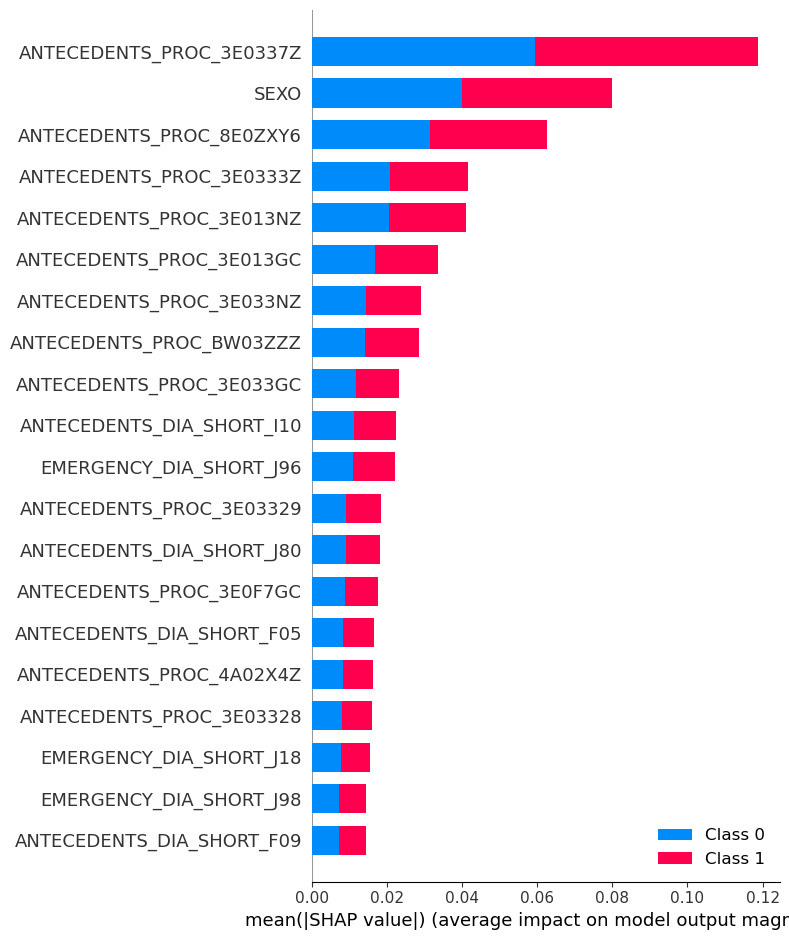

In [10]:
import shap

# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(ensemble)

# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_train, feature_names=dataset.feature_names)


In [11]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [12]:
# Evaluate SHAP values
shap_values = explainer(X_test)
print_feature_importances_shap_values(shap_values,dataset.feature_names)

ANTECEDENTS_PROC_3E0337Z -> 0.0594 (softmax = 0.0089)
SEXO -> 0.0400 (softmax = 0.0087)
ANTECEDENTS_PROC_8E0ZXY6 -> 0.0314 (softmax = 0.0086)
ANTECEDENTS_PROC_3E0333Z -> 0.0208 (softmax = 0.0085)
ANTECEDENTS_PROC_3E013NZ -> 0.0205 (softmax = 0.0085)
ANTECEDENTS_PROC_3E013GC -> 0.0167 (softmax = 0.0085)
ANTECEDENTS_PROC_3E033NZ -> 0.0146 (softmax = 0.0085)
ANTECEDENTS_PROC_BW03ZZZ -> 0.0143 (softmax = 0.0085)
ANTECEDENTS_PROC_3E033GC -> 0.0117 (softmax = 0.0085)
ANTECEDENTS_DIA_SHORT_I10 -> 0.0113 (softmax = 0.0085)
EMERGENCY_DIA_SHORT_J96 -> 0.0111 (softmax = 0.0085)
ANTECEDENTS_PROC_3E03329 -> 0.0092 (softmax = 0.0084)
ANTECEDENTS_DIA_SHORT_J80 -> 0.0091 (softmax = 0.0084)
ANTECEDENTS_PROC_3E0F7GC -> 0.0088 (softmax = 0.0084)
ANTECEDENTS_DIA_SHORT_F05 -> 0.0082 (softmax = 0.0084)
ANTECEDENTS_PROC_4A02X4Z -> 0.0082 (softmax = 0.0084)
ANTECEDENTS_PROC_3E03328 -> 0.0080 (softmax = 0.0084)
EMERGENCY_DIA_SHORT_J18 -> 0.0078 (softmax = 0.0084)
EMERGENCY_DIA_SHORT_J98 -> 0.0072 (softmax = 0.

In [13]:
shap.plots.bar(shap_values)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
shap.summary_plot(shap_values)


In [ ]:
shap.summary_plot(shap_values, plot_type='violin')